# Clasificacion de Reseñas de Alimentos de Amazon con NLP

### Integrates de Grupo: **A**
* Licett Ancari (licett.ancari.villcarani@gmail.com)
* Frida Aduviri (fridajulietaaduvirimoya@gmail.com)

## Descripcion del DataSet

El conjunto de datos consta de datos de 13 años que consta de 10 atributos para 568000 revisiones. Debido a la complejidad computacional, utilizaremos una muestra aleatoria de 10.000 reseñas para nuestro análisis.

The dataset contains the following columns :

1.Id->Review for each ID

2.Product Id->Unique identifier for the product

3.User Id->Unique identifier for the user

4.Profile Name->A user who has given the review

5.Helpful Numerator->No. of users who found the review helpful

6.Helpful Denominator->No. of users who found the review helpful or not

7.Score->Five being is the highest rating and 1 being the lowest rating

8.Time->Date and time  when the review was given

9.Summary->Summary of the review

10.Text->Review text


 # Lectura de datos

In [1]:
import pandas as pd
#load the data
sample=pd.read_csv('Resenas_Alimentos_cortado.csv',encoding='ISO-8859-1')

In [2]:
#check the loaded data
print(sample.shape)

(10000, 10)


In [3]:
#look of the dataset
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<Axes: ylabel='count'>

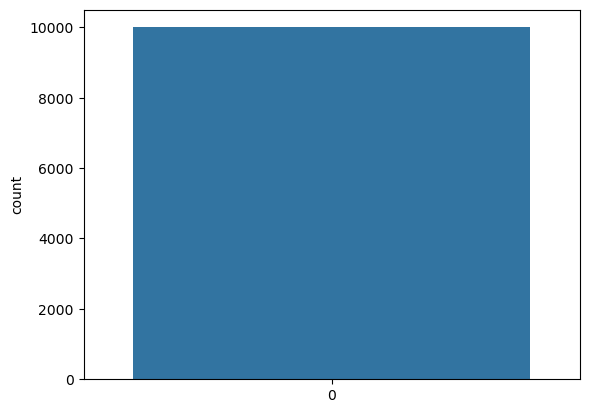

In [4]:
# Understand how customer ratings are distributed
import seaborn as sns
sns.countplot(sample.Score)

 # Limpieza de datos

Convertir las revisiones numéricas en revisiones categóricas en condiciones superiores a 3 son positivo y menos de 3 son negativos ya que las reseñas calificadas con 3 no son de mucha utilidad para analizar

In [5]:
#funcion
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#Cambiar opiniones con una puntuación inferior a 3 para ser positiva
actualScore = sample['Score']
positiveNegative = actualScore.map(partition)
sample['Score'] = positiveNegative

In [6]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
# no de críticas positivas y negativas
sample["Score"].value_counts()
#Aquí podemos decir que es un conjunto de datos desequilibrado.

positive    8478
negative    1522
Name: Score, dtype: int64

In [8]:
#Eliminando la columna de duplicados, si la hay, usando soltar duplicados de pandas
sorted_data=sample.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(9515, 10)

In [9]:
# no se encontraron columnas duplicadas
(final['Id'].size*1.0)/(sample['Id'].size*1.0)*100

95.15

In [10]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
# Ayuda.. Num es siempre menor que Denom.. como Denom es gente que vota a favor y no vota
#Before comprensión del preprocesamiento de texto permite ver el número de entradas restantes
print(final.shape)

# ¿Cuántas reseñas positivas y negativas hay en nuestro conjunto de datos?
final['Score'].value_counts()

# Después de eliminar filas duplicadas encontramos 336824 positivas y 57107 negativas.

(9515, 10)


positive    8082
negative    1433
Name: Score, dtype: int64

<Axes: xlabel='Score', ylabel='count'>

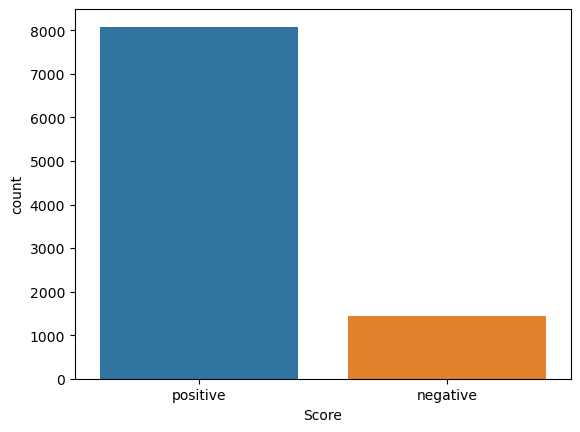

In [12]:
import seaborn as sns

# Asumiendo que 'final' es tu DataFrame
# Si aún no has importado Pandas, asegúrate de hacerlo.

# Crea un gráfico de conteo utilizando Seaborn
sns.countplot(data=final, x='Score')


# Procesamiento de texto

Para limpiar el texto eliminando reseñas de etiquetas HTML, palabras vacías para segregar y agregando marcas de tiempo

In [13]:
# Encuentra oraciones que contengan etiquetas HTML
import re
i=0;
for sent in final['Text'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

1
Why is this $[...] when the same product is available for $[...] here?<br />http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDY<br /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


In [14]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer which is developed in recent years
stop=set(stopwords.words('english'))
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{'about', 'myself', 'or', 'isn', 'did', 'ain', 'shouldn', 'that', 'd', 'are', 'because', 'll', 'weren', 'those', 'no', 'other', "you've", 'above', 'now', 'aren', 'been', 'off', 'at', 'mustn', 'against', 'its', 'is', "hasn't", "shan't", 'yourself', 'very', 'again', 'couldn', 'can', 'both', 'as', 'ours', "hadn't", 'same', 'his', 'through', 'which', 'not', "you're", 'to', "you'd", 'for', 'with', 'further', 'being', "isn't", 'of', 'then', 'wouldn', 'won', 'under', 'between', 'these', 'and', 'yours', "weren't", 'over', "couldn't", 'didn', 'a', 'where', 'who', "won't", "it's", 'my', 'but', 't', 'up', 'am', 'on', 'nor', 'by', 'how', 'whom', 'we', 'were', 'm', "aren't", "wasn't", 'me', 'down', 'any', 'having', 'our', 's', 'more', "mustn't", 'mightn', 'below', 'when', 'will', 'before', 'once', 've', 'don', 'so', "wouldn't", 'only', 'she', 'in', 'hadn', 'some', 'until', 'was', 're', 'out', "you'll", 'shan', 'after', 'here', 'needn', 'what', 'from', 'herself', 'him', 'does', 'wasn', 'ourselves', 

In [15]:
i=0
str1=' '
final_string=[]
all_positive_words=[] #almacene palabras de +ve reseñas aquí
all_negative_words=[] #almacene palabras de -ve reseñas aquí
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # Eliminar etiquetas HTML
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive':
                        all_positive_words.append(s) # Lista de todas las palabras utilizadas para describir reseñas positivas
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) # lista de todas las palabras utilizadas para describir reseñas negativas
                else:
                    continue
            else:
                continue
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) # cadena final de palabras limpias
    #print("***********************************************************************")

    final_string.append(str1)
    i+=1

In [16]:
final['CleanedText']=final_string #agregar una columna de CleanedText que muestra los datos después del preprocesamiento de la revisión
final['CleanedText']=final['CleanedText'].str.decode("utf-8")

In [17]:
final.shape # columna de texto limpiada agregada

(9515, 11)

In [18]:
final.head(3) #debajo de la revisión procesada se puede ver en la columna CleanedText

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
2774,2775,B00002NCJC,A13RRPGE79XFFH,reader48,0,0,positive,1281052800,Flies Begone,We have used the Victor fly bait for 3 seasons...,use victor fli bait season cant beat great pro...
2773,2774,B00002NCJC,A196AJHU9EASJN,Alex Chaffee,0,0,positive,1282953600,thirty bucks?,Why is this $[...] when the same product is av...,product avail www amazon com victor trap unrea...
1243,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,positive,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,receiv shipment could hard wait tri product lo...


In [19]:
# however, this is not required for clustering, just segregaring positive,negative and storing seperetly
data_pos = final[final["Score"] == "positive"]
data_neg = final[final["Score"] == "negative"]
final = pd.concat([data_pos, data_neg])
score =final["Score"]
final.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
2774,2775,B00002NCJC,A13RRPGE79XFFH,reader48,0,0,positive,1281052800,Flies Begone,We have used the Victor fly bait for 3 seasons...,use victor fli bait season cant beat great pro...
2773,2774,B00002NCJC,A196AJHU9EASJN,Alex Chaffee,0,0,positive,1282953600,thirty bucks?,Why is this $[...] when the same product is av...,product avail www amazon com victor trap unrea...
1243,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,positive,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,receiv shipment could hard wait tri product lo...
1244,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,positive,961718400,Great Product,This was a really good idea and the final prod...,realli good idea final product outstand use de...
9524,9525,B00005V3DC,A2ZYCEEYBUQZND,"Robby ""Robby C""",5,7,positive,1176249600,Best herbal tea for digestion,If you're new to this product you need to be v...,your new product need care dosag strong batch ...


In [20]:
#Convertir el marco de tiempo y la clasificación en orden creciente para facilitar la facilidad
final["Time"] = pd.to_datetime(final["Time"], unit = "s")
final= final.sort_values(by = "Time")
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
1244,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,positive,2000-06-23,Great Product,This was a really good idea and the final prod...,realli good idea final product outstand use de...
1243,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,positive,2000-06-29,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,receiv shipment could hard wait tri product lo...
8110,8111,B0000EIE2Z,A3M174IC0VXOS2,Gail Cooke,3,3,positive,2004-01-30,BEST BLUEBERRIES,In the winter when fresh blueberries exceed ou...,winter fresh blueberri exceed food budget dri ...
3782,3783,B00016UX0K,AF1PV3DIC0XM7,Robert Ashton,1,2,positive,2004-04-10,Classic Condiment,Mae Ploy Sweet Chili Sauce is becoming a stand...,mae ploy sweet chili sauc becom standard condi...
7431,7432,B0001E1IME,A2IKCTD1I73PLW,Adeba,2,8,positive,2004-05-02,amazon monopoly/ripoff,love the snack. wanted to buy a bunch.<p>ship...,love snack want buy bunch ship amazon price sn...


#  Clustering

Encuentre modelos de agrupación para bolsa de palabras, frecuencia de términos/frecuencia de documentos inversa y promedio de palabra a vector

### K means using bag of words

In [21]:
# Generación de funciones de bolsa de palabras.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(final['CleanedText'].values)
bow.shape


(9515, 11778)

In [22]:
bow

<9515x11778 sparse matrix of type '<class 'numpy.int64'>'
	with 292600 stored elements in Compressed Sparse Row format>

In [23]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [24]:
# para entender qué tipo de palabras generadas como columnas por BOW
terms = count_vect.get_feature_names_out()

In [25]:
# primeras 10 columnas generadas por BOW
terms[1:10]

array(['aahhh', 'aback', 'abandon', 'abat', 'abberlin', 'abbi', 'abbott',
       'abdomin', 'abid'], dtype=object)

In [26]:
#usando todos los procesos trabajos = -1 y k significa ++ para iniciar la ventaja de inicialización
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++', random_state=99)
model.fit(bow)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=99)

In [27]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [28]:
cluster_center

array([[0.        , 0.        , 0.        , ..., 0.02688172, 0.        ,
        0.        ],
       [0.        , 0.00014899, 0.00014899, ..., 0.00253278, 0.00014899,
        0.00014899],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0018622 , 0.        , 0.        , ..., 0.01303538, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [29]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')

In [30]:
# que nos dice que los clusters están lejos unos de otros
silhouette_score

0.061839032919513134

In [31]:
# Dar etiquetas/asignar un grupo a cada punto/texto
df = final
df['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,Bow Clus Label
1244,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,positive,2000-06-23,Great Product,This was a really good idea and the final prod...,realli good idea final product outstand use de...,1
1243,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,positive,2000-06-29,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,receiv shipment could hard wait tri product lo...,1


In [32]:
# How many points belong to each cluster -> using group by in pandas
df.groupby(['Bow Clus Label'])['Text'].count()

Bow Clus Label
0     186
1    6712
2     104
3     185
4     642
5       6
6     960
7     537
8     182
9       1
Name: Text, dtype: int64

In [34]:
#Refrence credit - to find the top 10 features of cluster centriod
#https://stackoverflow.com/questions/47452119/kmean-clustering-top-terms-in-cluster
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
#terms = count_vect.get_feature_names()
terms = count_vect.get_feature_names_out()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: food
 dog
 cat
 eat
 one
 like
 love
 tri
 year
 get
Cluster 1: love
 great
 good
 product
 tast
 like
 flavor
 use
 one
 tri
Cluster 2: coffe
 cup
 flavor
 tast
 like
 use
 tri
 good
 brew
 one
Cluster 3: tea
 flavor
 tast
 green
 like
 drink
 use
 tri
 water
 bag
Cluster 4: coffe
 cup
 tast
 flavor
 like
 good
 use
 tri
 one
 great
Cluster 5: chip
 kettl
 brand
 potato
 bag
 also
 flavor
 flavour
 product
 honey
Cluster 6: like
 tast
 flavor
 chip
 tri
 good
 one
 realli
 bag
 dont
Cluster 7: use
 product
 make
 like
 one
 mix
 good
 tast
 get
 tri
Cluster 8: juic
 drink
 orang
 soda
 tast
 like
 flavor
 sugar
 carbon
 switch
Cluster 9: point
 box
 gentl
 knife
 edg
 corner
 upon
 top
 slit
 may


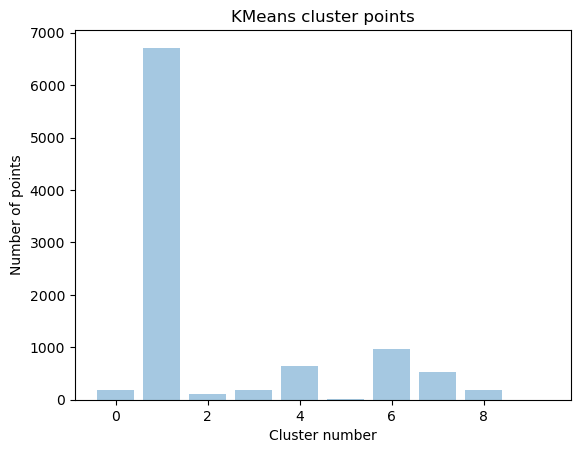

In [35]:
# visually how points or reviews are distributed across 10 clusters
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['Bow Clus Label'])['Text'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [36]:
# Reading a review which belong to each group.
for i in range(10):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['Bow Clus Label']).groups[i][0]]['Text'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
I love my garlic spray so much, that i ordered more! I grow garlic, but I don't even bother juicing them anymore, not with this product. There are 150 cloves in every bottle. Thats a lot of yummy garlic...


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
If you want a quick pick me up that is not full of added sugar, then this is a refreshing alternative to a soda. The flavor is more heavily tangerine (which only makes sense). It isn't overly sweet, which is a good thing.


______________________________________________________________________
A review of assigned to cluster  2
----------------------------------------------------------------------
Great product for the price. Only negative would be the packaging. Since I keep mine in the freezer a single

In [37]:
#considers sample of 3 random reviews for cluster 0

print(df.iloc[df.groupby(['Bow Clus Label']).groups[0][3]]['Text'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[0][15]]['Text'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[0][25]]['Text'])

These DisposaKups work great.  I simply fill up a dozen or more with my favorite flavored coffee, and I'm good to go.  It's a great alternative to buying the expensive pre-filled K-cups; not only were the pre-filled K-cups expensive, but they don't offer my favorite coffee blends.  I was using the reusable K-cup filters which are quite expensive to purchase, so I only had 2 & they leaked while brewing & were messy to empty and wash to re-use.  The DisposaKups work much better--just as well as the pre-filled K-cups, no leaks, no mess!  And I can re-use them again if I want by throwing out the filter, rinsing, & using a fresh filter (just have to line up the holes).  Great product! I highly recommend it.  I love my coffee machine again.
______________________________________________________________________
We were running out of vanilla. I'd made my own before using vanilla beans and vodka, and the price of these was far cheaper than getting them locally. I figured it was worth a shot.<b

In [38]:
#consider sample of 3 random reviews for cluster 4

print(df.iloc[df.groupby(['Bow Clus Label']).groups[3][3]]['Text'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[3][15]]['Text'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[3][25]]['Text'])

How many ways can you say "YUM!" ?  It's a delicious way to wake up in the morning--or to enjoy any time of the day.
______________________________________________________________________
Purchased two liters... looking for an oil to put in salads, on bread, etc... something with a strong flavor of olive oil... this is NOT it.  This is good for cooking... has little flavor.
______________________________________________________________________
I had pretty high hopes for the Busy Bone. I have a large, active chewer (the kind of dog that has to have several bones to choose from all the time if you don't want her to chew up your bed frame). I was hoping that with the Busy Bone's 'long-lasting' promise, I might be able to just give her one of these and at least have time to wash the dishes. Why don't I describe what happened next...<br />I was in the kitchen washing the dishes. It had been about fifteen minutes since I'd given the dog the bone. Deeply absorbed in annoyance with myself for

In [39]:
#consider sample of 3 random reviews for cluster 4

print(df.iloc[df.groupby(['Bow Clus Label']).groups[5][3]]['Text'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[5][15]]['Text'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[5][25]]['Text'])

My cat LOVES Fancy Feast cat food; and this variety pack in particular makes mealtime a veritable newsworthy event! He always eats it down and he loves it; I can tell.<br /><br />You get eight cans of Ocean Whitefish & Tuna Feast; eight more cans of Savory Salmon Feast with Cod and eight more cans still of Sole & Shrimp Feast. Very good!<br /><br />The food does have some nutritional content; I always look for that when I buy food for the cat. There's some vitamin E, A, D3, B12, and B1. I like that. Naturally, ask your vet if you have any concerns about your cat's personal individual needs for nutritional content in their daily diet.<br /><br />If you catch a sale on this, stock up! However, I would use these cans of food within six months of buying them.<br /><br />Overall, this is one of the better brands of cat food out there; and I recommend it. Your cat will love it and it has nutritional content which is great for them, too.
_______________________________________________________

IndexError: index 15 is out of bounds for axis 0 with size 6

__Analysis of K means for BOW:__

__De todos los grupos, 0, 4 y 6 representan más% de las revisiones; comprender las diferencias entre estos 3 grupos es clave. Además, los grupos 2 y 9 tienen solo 1 revisión.

If we observe the top terms per cluster, The cluster 4 which consists of LIKE AND LOVE, which are top centroid features and can say this cluster consists of all positive reviews, let us obersve few reviews of each cluster and try to understand the differences

Si observamos los términos principales por grupo, el grupo 4 que consta de ME GUSTA Y AMOR, que son características del centroide superior y podemos decir que este grupo consta de todas las revisiones positivas, observemos algunas revisiones de cada grupo y tratemos de comprender las diferencias.

Al leer los grupos 2 y 9, que contienen solo una reseña, que es claramente negativa, podemos concluir que a los clientes no les gustó el producto en absoluto y no se usa ninguna palabra de manera extensiva.

Al leer reseñas aleatorias del grupo 0, podemos decir fácilmente que estas reseñas son extremadamente positivas sobre el uso del producto y que los clientes están muy contentos con el producto.

Al leer reseñas aleatorias del grupo 4, podemos decir que la palabra clave PERO se repite a lo largo de la reseña, lo que indica que algún tipo de gente está de acuerdo con la mayoría de las cosas relacionadas con los productos, pero hay algo que está ligeramente en desacuerdo con la calidad o la entrega del producto. o algo menos de lo que esperaban



##  K means using TFIDF

In [40]:
#tfidf vector initililization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(final['CleanedText'].values)
tfidf.shape

(9515, 11778)

In [42]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 10,random_state=99)
model_tf.fit(tfidf)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=99)

In [43]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_

In [44]:
cluster_center_tf

array([[0.        , 0.        , 0.        , ..., 0.00651568, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00016227],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00045113, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [46]:
# to understand what kind of words generated as columns by BOW
terms = count_vect.get_feature_names_out()

In [48]:
terms[1:10]

array(['aahhh', 'aback', 'abandon', 'abat', 'abberlin', 'abbi', 'abbott',
       'abdomin', 'abid'], dtype=object)

In [49]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

In [50]:
silhouette_score_tf

0.014636731726648233

In [51]:
# Giving Labels/assigning a cluster to each point/text
df1 = df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,Bow Clus Label,Tfidf Clus Label
1244,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,positive,2000-06-23,Great Product,This was a really good idea and the final prod...,realli good idea final product outstand use de...,1,6
1243,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,positive,2000-06-29,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,receiv shipment could hard wait tri product lo...,1,2
8110,8111,B0000EIE2Z,A3M174IC0VXOS2,Gail Cooke,3,3,positive,2004-01-30,BEST BLUEBERRIES,In the winter when fresh blueberries exceed ou...,winter fresh blueberri exceed food budget dri ...,1,6
3782,3783,B00016UX0K,AF1PV3DIC0XM7,Robert Ashton,1,2,positive,2004-04-10,Classic Condiment,Mae Ploy Sweet Chili Sauce is becoming a stand...,mae ploy sweet chili sauc becom standard condi...,1,6
7431,7432,B0001E1IME,A2IKCTD1I73PLW,Adeba,2,8,positive,2004-05-02,amazon monopoly/ripoff,love the snack. wanted to buy a bunch.<p>ship...,love snack want buy bunch ship amazon price sn...,1,2


In [52]:
# How many points belong to each cluster ->

df1.groupby(['Tfidf Clus Label'])['Text'].count()

Tfidf Clus Label
0     407
1     339
2    1549
3     478
4     324
5     234
6    4256
7    1001
8     423
9     504
Name: Text, dtype: int64

In [54]:
#Refrence credit - to find the top 10 features of cluster centriod
#https://stackoverflow.com/questions/47452119/kmean-clustering-top-terms-in-cluster
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: dog
 food
 treat
 love
 newman
 eat
 like
 ingredi
 one
 organ
Cluster 1: pancak
 mix
 gluten
 waffl
 bisquick
 free
 make
 use
 product
 biscuit
Cluster 2: product
 order
 amazon
 price
 store
 great
 ship
 buy
 find
 love
Cluster 3: tea
 green
 ice
 drink
 tast
 like
 flavor
 love
 bag
 great
Cluster 4: juic
 orang
 soda
 drink
 carbon
 tangerin
 switch
 tast
 sugar
 flavor
Cluster 5: cat
 food
 eat
 love
 treat
 grass
 one
 like
 vomit
 grow
Cluster 6: tast
 like
 good
 flavor
 love
 great
 use
 one
 tri
 eat
Cluster 7: coffe
 cup
 flavor
 tast
 like
 roast
 good
 one
 use
 bitter
Cluster 8: chocol
 hot
 cocoa
 tast
 cup
 dark
 tri
 milk
 flavor
 good
Cluster 9: chip
 bag
 flavor
 potato
 salt
 kettl
 great
 like
 vinegar
 love


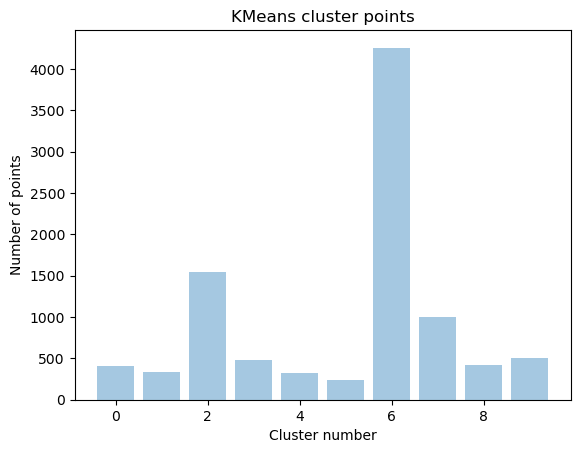

In [55]:
# visually how points or reviews are distributed across 10 clusters

plt.bar([x for x in range(10)], df1.groupby(['Tfidf Clus Label'])['Text'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [56]:
# Reading a review which belong to each group.
for i in range(10):
    print("4 review of assigned to cluster ", i)
    print("-" * 70)
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][5]]['Text'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][10]]['Text'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][20]]['Text'])
    print('\n')
    print("_" * 70)

4 review of assigned to cluster  0
----------------------------------------------------------------------
I really love this tea and have found that my daughter and daughter-in-law feel the same!  I've used the loose leaf tea for years but find the convenience of the bags encouraging.


I thought I was purchasing a high quality item but it's not all that. The chocolate is very sweet and as you chew on this product you can tell the chocolate is loaded with sugar by the crunchy texture. I'm going to say it's not worth the money and I'm not satisfied.<br />At the same time of purchasing this product I also bought Sunmaid chocolate covered raisons which I rate from a 1-10...a 10. Now we are talking about yumminess!!!!!<br />So customers...if you are going to choose...let it be the Sunmaid...you won't be dissappointed


I have tried literally dozens of teas since being introduced to the Russian custom of preparing and drinking tea, and the Ahmad Imperial blend is probably my favorite of all

IndexError: single positional indexer is out-of-bounds

__Analysis of K means for TF_IDF:__

____De todo el grupo, 4 representan más % de reseñas, es decir, más de 4000.

Si observamos los términos principales por grupo, los grupos basados ​​en los productos y en cuanto a los gustos y disgustos del producto. por ejemplo, si observamos el grupo 8, las reseñas hablan más de chips, patatas y otros productos que son como snacks.

En estos, es mejor comprender las características principales del centro del grupo que las revisiones individuales.

# Average Word to Vector

In [2]:
import numpy as np

print("Versión de NumPy:", np.__version__)

Versión de NumPy: 1.23.5


In [57]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sent=[]
for sent in final['CleanedText'].values:
    list_of_sent.append(sent.split())

In [58]:
print(final['CleanedText'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

realli good idea final product outstand use decal car window everybodi ask bought decal made two thumb
*****************************************************************
['realli', 'good', 'idea', 'final', 'product', 'outstand', 'use', 'decal', 'car', 'window', 'everybodi', 'ask', 'bought', 'decal', 'made', 'two', 'thumb']


In [59]:

# removing html tags and apostrophes if present.
import re
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [60]:
i=0
list_of_sent_train=[]
for sent in final['CleanedText'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue
    list_of_sent_train.append(filtered_sentence)

In [62]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape


C:\Users\Lis\AppData\Local\Temp\ipykernel_7100\3118248424.py:13: RuntimeWarning: invalid value encountered in divide
  sent_vec /= cnt_words


(9515, 100)

## K Means CLustering for Avg word to vectors

In [63]:
# Number of clusters to check.
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

In [65]:
# Training the best model --
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lis\AppData\Local\Temp\ipykernel_7100\2757166966.py:4: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  model2.fit(sent_vectors)


KMeans(n_clusters=2)

In [66]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

In [67]:
word_cluster_center[1:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [68]:
# Giving Labels/assigning a cluster to each point/text
dfa = df1
dfa['AVG-W2V Clus Label'] = model2.labels_
dfa.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
1244,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,positive,2000-06-23,Great Product,This was a really good idea and the final prod...,realli good idea final product outstand use de...,1,6,0
1243,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,positive,2000-06-29,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,receiv shipment could hard wait tri product lo...,1,2,0


In [69]:
# How many points belong to each cluster ->
dfa.groupby(['AVG-W2V Clus Label'])['Text'].count()

AVG-W2V Clus Label
0    9515
Name: Text, dtype: int64

In [70]:
# Reading a review which belong to each group.
for i in range(optimal_clusters):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(dfa.iloc[dfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Text'])
    print('\n')
    print(dfa.iloc[dfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Text'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
If you want a quick pick me up that is not full of added sugar, then this is a refreshing alternative to a soda. The flavor is more heavily tangerine (which only makes sense). It isn't overly sweet, which is a good thing.


While orange juice is the fourth ingredient in this drink,  the dominant flavor is a muddy orange which is backed up by a low level of carbonation.  I think that the use of the inexpensive apple and white grape juices as the first two ingredients (tangerine is third) is what results in the unpleasant muddied orange taste. Finally they threw in a bit of acerola juice but to no avail.  To my taste this stuff is suprisingly unpalatable.<br /><br />While the marketing suggestion is that the natural ingredients make these juices healthy that idea is negated by the high level of completely "natural" sugar in this or most any juice.  The healthy alterative to overly su

KeyError: 1

## Clustering DBSCAN

In [71]:
from sklearn.cluster import DBSCAN

In [72]:
# Computing 200th Nearest neighbour distance
minPts = 2 * 100
# Lower bound function copied from -> https://gist.github.com/m00nlight/0f9306b4d4e61ba0195f
def lower_bound(nums, target): # This function return the number in the array just greater than or equal to itself.
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 200 and dists[199] > dist): # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

    return dists[199] # Dist 199 contains the distance of 200th nearest neighbour.

In [73]:
# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

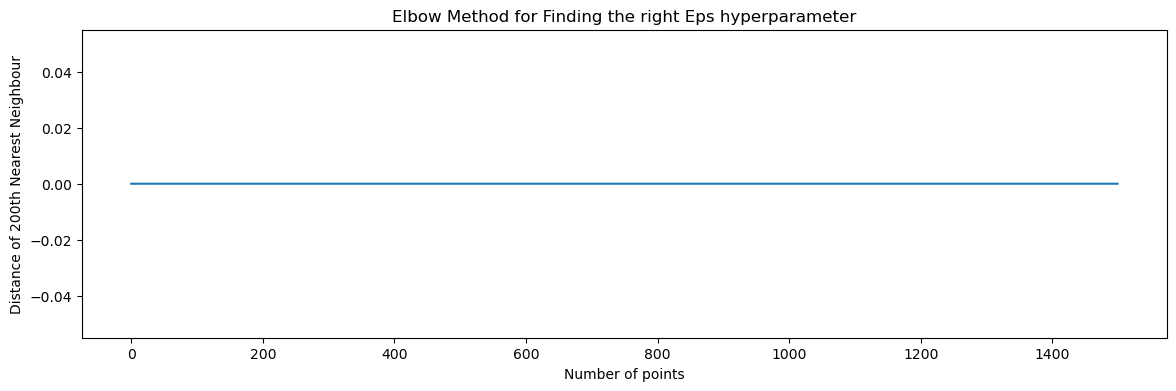

In [74]:

# Plotting for the Elbow Method :
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()


Conclusions for Elbow Method

The Knee point seems to be 5. So Eps = 5

In [75]:
# Training DBSCAN :
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

DBSCAN(eps=5, min_samples=200, n_jobs=-1)

In [76]:

dfdb = dfa
dfdb['AVG-W2V Clus Label'] = model.labels_
dfdb.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
1244,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,positive,2000-06-23,Great Product,This was a really good idea and the final prod...,realli good idea final product outstand use de...,1,6,0
1243,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,positive,2000-06-29,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,receiv shipment could hard wait tri product lo...,1,2,0


In [77]:
dfdb.groupby(['AVG-W2V Clus Label'])['Id'].count()

AVG-W2V Clus Label
0    9515
Name: Id, dtype: int64